# Omics integration in MEWpy

Author: Vitor Pereira and Lucas Miguel

License: [CC BY-SA 4.0](http://creativecommons.org/licenses/by-sa/4.0/)

-------

This notebook exemplifies how MEWpy integrates omics data, in this case gene expression data, into the models.
We will apply GIMME and E-Flux algorithms.

GIMME: minimizes usage of low-expression reactions while keeping the objective (e.g., biomass) above a certain value. We need a cutoff value to determine if the reaction is activated or not. It's a binary decision over the reactions.

E-Flux: uses transcriptomic data to set upper and lower bounds on metabolic fluxes. Reactions associated with more highly expressed genes will be allowed to have higher absolute flux values.

Usage in anaerobic simulations:

1. GIMME modifications for glucose uptake with gene expression data
2. GIMME modifications for xylose uptake with gene expression data

#### Packages

In addition to installing cobrapy, pandas and mewpy, we will need "matplotlib" as well.

Open a cell here and run:

pip install matplotlib

After, restart Kernell or open and close the jupyter notebook.

In [ ]:
#pip install matplotlib

In [1]:
from cobra.io import read_sbml_model
from mewpy.simulation import get_simulator
import pandas as pd


from mewpy.omics import ExpressionSet
from mewpy.omics import GIMME
from mewpy.omics import eFlux

import matplotlib.pyplot as plt

Yeast could consumes xylose (5C sugar) after a genetically modification. The XR-XDH pathway is insert, but suffers with xylitol accumulation and cofactor availability.

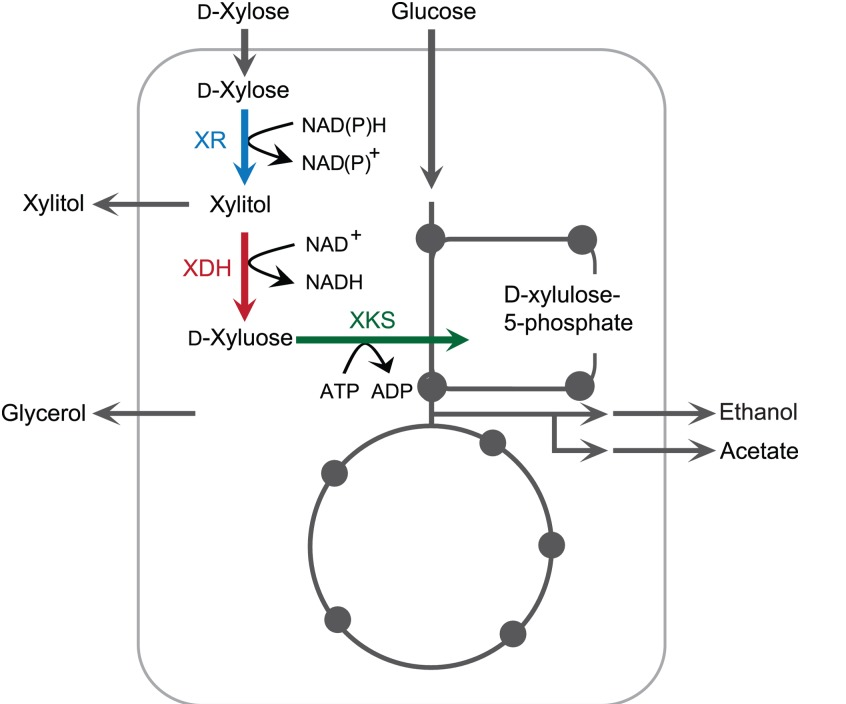

 https://europepmc.org/article/med/23183982

# Exercise 10
We have just shown how to use the GIMME method from MewPy. Now, apply the same principles to solve the following exercises:

a) Load the model;

In [16]:
model_2 = read_sbml_model('../data/iMM904.xml')

b) Create a simulation for anaerobic environment;

In [17]:
#Example with industrial transcriptomics data during glucose fermentation

envcond_glc = {"EX_glc__D_e":(-10,1000), "EX_xyl__D_e":(0,0), #glucose and xylose exchange
               "EX_epist_e":(-1000,1000), "EX_epistest_SC_e":(-1000,1000),"ERGSTt":(-1000,1000), 
               "EX_ergstest_SC_e":(-1000,1000), "EX_fecost_e":(-1000,1000), "EX_lanost_e":(-1000,1000),  #sterols
               "EX_lanostest_SC_e":(-1000,1000), "EX_zymst_e":(-1000,1000), "EX_zymstest_SC_e":(-1000,1000),
               "ERGTETROLter":(-1000,1000), "EX_pc_SC_e":(-1000,1000), "EX_ptd1ino_SC_e":(-1000,1000),
               "EX_o2_e":(0,0) #oxygen exchange
              }

simul_2 = get_simulator(model_2, envcond = envcond_glc)

c) Apply E-Flux algorithm.

Hint: Use eFlux as follows: 

`g = eFlux(simul, expr,parsimonious=True)`

In [18]:
expression = pd.read_csv("../data/gene_expression_data.txt",sep="\t",index_col=0)
expression.head(5)

Glucose_medium  Xylose_medium
genes                                 
YGR121C         8.75635       12.77670
YIL009W        31.34840       18.60180
YER089C        40.99820       28.90290
YML037C         5.24355        1.31501
YDR383C         7.88679        4.49923

In [19]:
#Example with industrial transcriptomics data during glucose fermentation

#get genes and expression data
genes_2 = expression.index.values
conditions_2 = ["Glucose_medium"]
exp_2 = expression[conditions_2].to_numpy()

# load expression module
expr_2 = ExpressionSet(genes_2, conditions_2, exp_2)

# Apply eFlux in the model
g_2 = eFlux(simul_2, expr_2,parsimonious=True)

#results to dataframe
res_xyl = g_2.dataframe
res_xyl.columns = ["glu_fluxes"]
res_xyl

glu_fluxes
Reaction ID            
13GS           0.001419
ACALDtm       -0.001915
ACCOAC         0.000027
AGAT_SC        0.000031
AGPRim         0.000407
...                 ...
URIDK2r       -0.000008
PTRCt3i        0.002544
PTRCtex2       0.002544
PYK            0.106165
PYRDC          0.099665

[286 rows x 1 columns]